<a href="https://colab.research.google.com/github/tucker-anderson/Facial-Keynotes/blob/master/Facial_Keypoints_Notebook_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W207 Final Project: Facial Keypoints Detection

Section 6; Summer 2019

**Team Members:**
- Tucker Anderson
- Bruno Todescan
- Madia Taher

In [11]:
# First setup environment
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import csv

from tensorflow import keras as keras
import tensorflow as tf

from sklearn.model_selection import train_test_split

%matplotlib inline

In [12]:
# Colab setup:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
# Define constants:
IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96

# Exploratory Data Analysis
Let's take a quick look at the data to understand a little about formatting, ranges, relationships, etc. 

In [14]:
#lookid_data = pd.read_csv("./drive/My Drive/W207_Appld_ML/IdLookupTable.csv")
lookid_data = pd.read_csv("IdLookupTable.csv")
lookid_data.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [15]:
# Take a quick look at the submission data
# samplesubmission = pd.read_csv("./drive/My Drive/W207_Appld_ML/SampleSubmission.csv")
samplesubmission = pd.read_csv("SampleSubmission.csv")
samplesubmission.head()

,RowId,Location
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [16]:
# Take a quick look at the training data:
#train_data = pd.read_csv("./drive/My Drive/W207_Appld_ML/training.csv")
train_data = pd.read_csv("training.csv")
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [17]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [18]:
len(train_data)

7049

In [22]:
print(train_data.count())# prints the number of values for each column
print(len(train_data))
df = train_data.dropna()  # drop all rows that have missing values in them
len(df)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

2140

There are clearly lots of missing values in the example data set. If we were to restrict our training data set to only the images with all valid number results, we would end up reducing our training set by almost 2/3, which could also lead to poor generalization.

We take note of this but continue forward with our investigation.

## Training Data

Let's take a deeper look at our training data, since this is what we will be mostly focused on.

In [23]:
# Check for duplicates
# Remove Image column
td_remove_image=train_data.drop(['Image'], axis=1)
td_remove_image.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [24]:
duplicate_imgs = td_remove_image[td_remove_image.duplicated()]
len(duplicate_imgs)

0

So we don't have any *exact* duplicates in the data set, which although good to know, would not have affected our results tremendously.

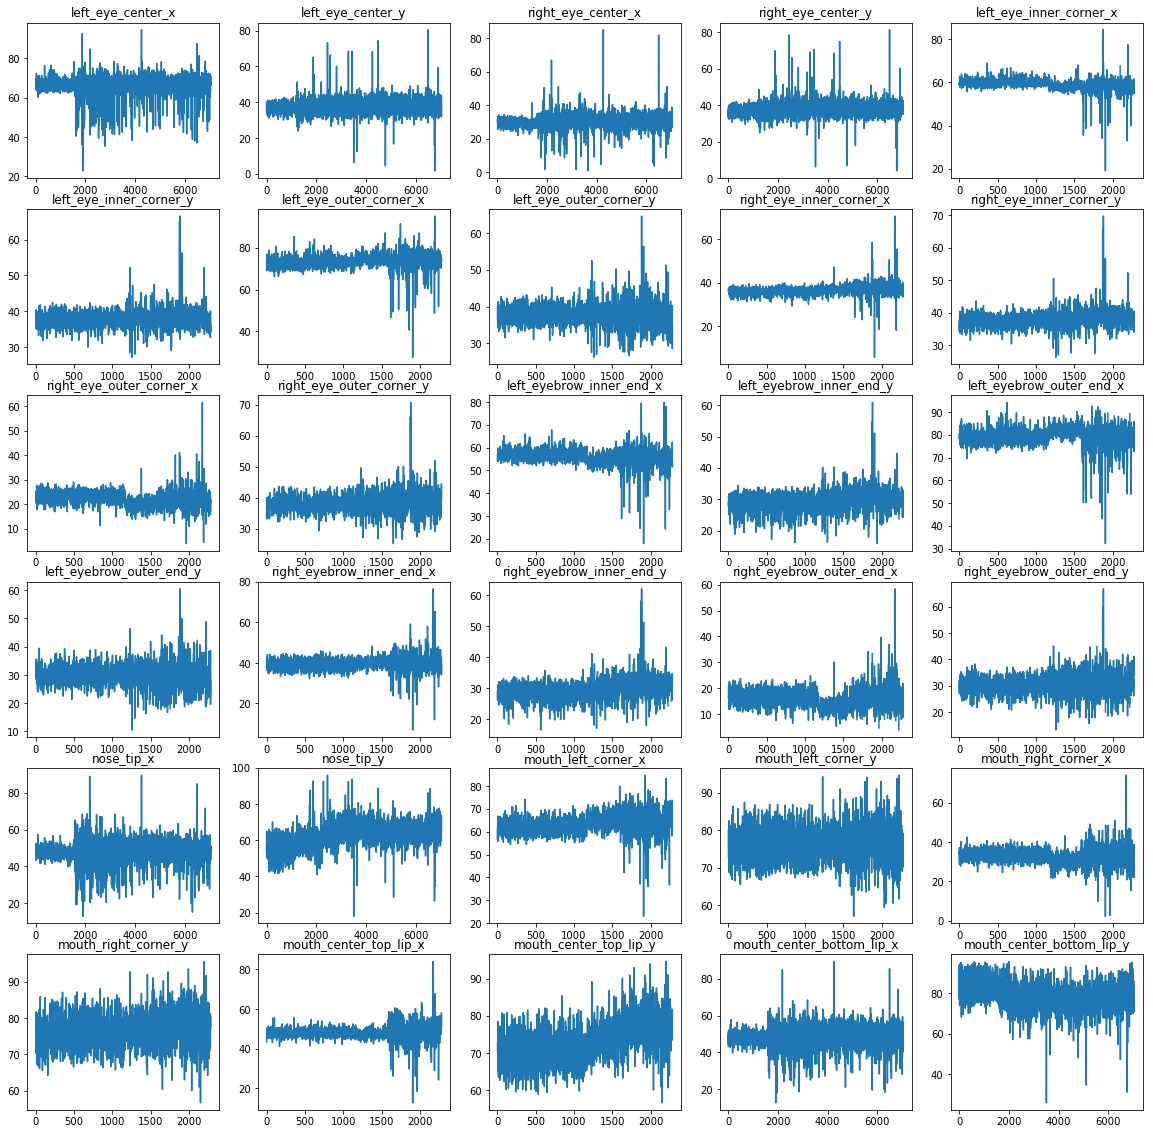

In [25]:
# Let's take a look at what the values look like. We use a line plot here and use histograms to below.
column_list=list(train_data.columns.values)
fig, ax = plt.subplots(figsize=(20,20),nrows=6, ncols=5)

i=0
for row in ax:
    for col in row:
        col.plot(train_data[column_list[i]])
        col.set_title(column_list[i])
        i=i+1

plt.show()

a = train_data.iloc[:,0].copy()

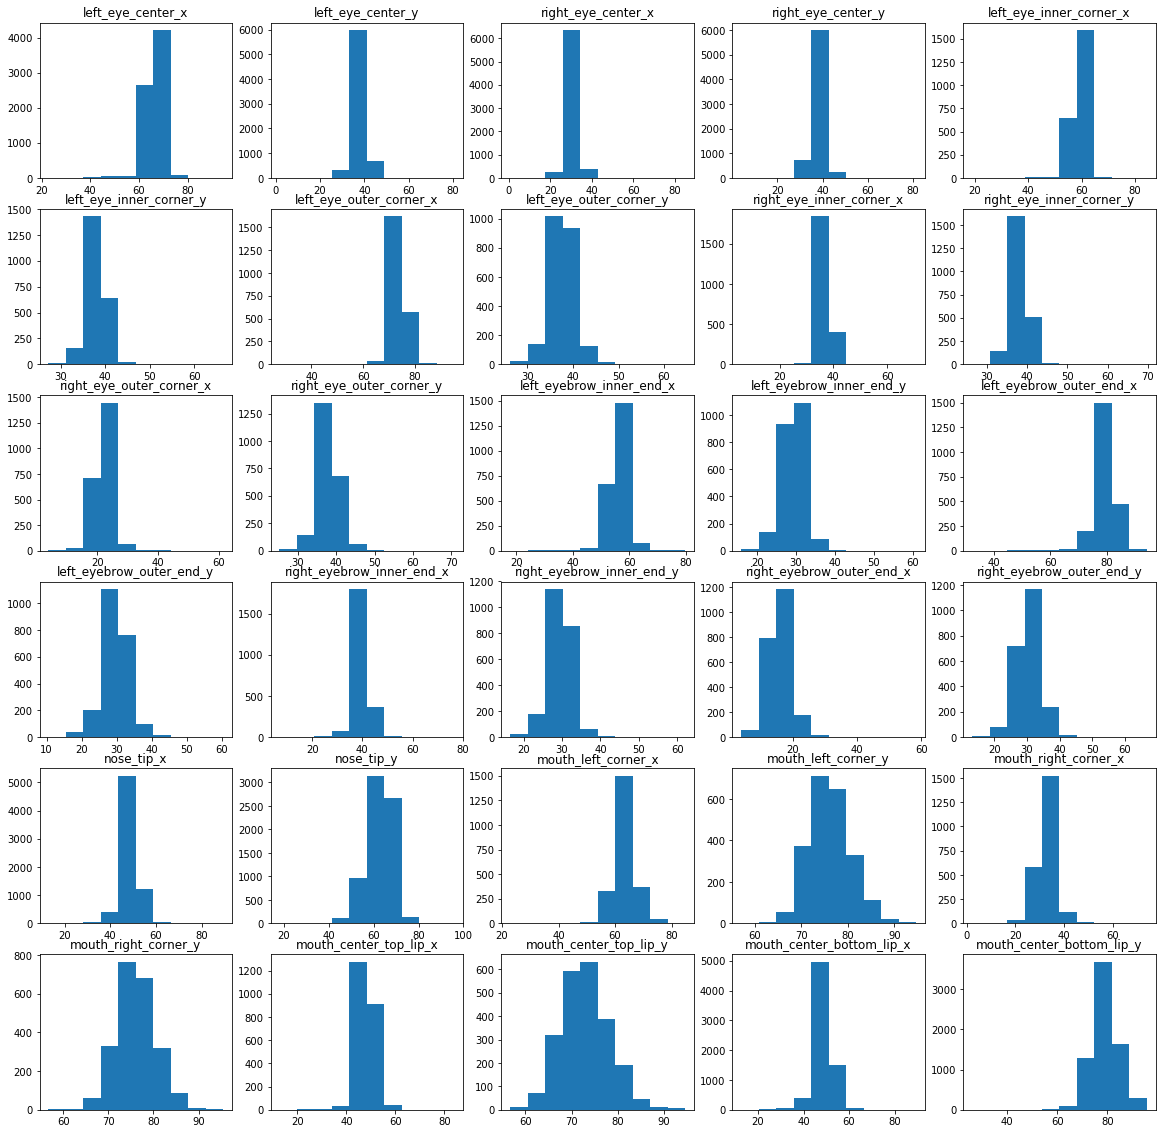

In [26]:
# What do the distributions look like (in 1-D)?
column_list=list(train_data.columns.values)
fig, ax = plt.subplots(figsize=(20,20),nrows=6, ncols=5)

i=0
for row in ax:
    for col in row:
        col.hist(train_data[column_list[i]].dropna())
        col.set_title(column_list[i])
        i=i+1

plt.show()

So from the above two cell results (line plots and histograms) we can see that the values are generally pretty tightly grouped around the same values.

## 2-D EDA

This only tells us half the story - since we are looking at coordinates in two dimensions, we take a look at what the feature vlaue ranges look like together, as X and Y pairs.

Before we can do this, we create some helper funcitons to split our trianing data set into the 'train' and 'test' components (image data and results data) and show the images when passed image data.

### Helper Functions

In [27]:
# this function will take a data frame as an input and spit out two numpy arrays as a result:
# one ('labels') for the labels only (columns 0 to 29) for each of the features we are predicting, and
# another ('data') for the image pixel data corresponding to a 9216-long array of integer values between 0 and 255.
def trainDataLabelSplit(df):
    # assuming a dataframe input
    nrows = df.shape[0]
    ncols = df.shape[1]
    
    # create a DF of just the labels
    labels = np.array(df.iloc[:,:ncols-1])

    data = np.empty(shape=(nrows,96,96,1))
    
    start = time.time()
    for i in range(nrows):
        data[i] = np.array(df.iloc[i,ncols-1].split()).reshape(96,96,1)
        if i % 500 == 0:
            print('%d: %.5f seconds elapsed.'%(i,time.time()-start))
    
    return labels, data.astype('int16')

In [28]:
start = time.time()
Ytrain, Xtrain = trainDataLabelSplit(train_data)
end = time.time()
print('Total %9.5f seconds.' %(end-start))

0: 0.00500 seconds elapsed.
500: 3.57079 seconds elapsed.
1000: 7.15924 seconds elapsed.
1500: 10.43299 seconds elapsed.
2000: 13.54930 seconds elapsed.
2500: 16.90558 seconds elapsed.
3000: 20.15777 seconds elapsed.
3500: 23.46129 seconds elapsed.
4000: 26.80090 seconds elapsed.
4500: 30.11964 seconds elapsed.
5000: 33.31648 seconds elapsed.
5500: 36.55933 seconds elapsed.
6000: 39.85825 seconds elapsed.
6500: 42.93134 seconds elapsed.
7000: 46.06343 seconds elapsed.
Total  46.58468 seconds.


In [29]:
# Take a dataframe as input expecting it to have been read from the test.csv input file.
# Reshape this data and return it as an numpy array.
def load_test_set(df):
    length = len(df)

    data = np.empty(shape=(length,96,96,1))
    
    start = time.time()
    for i in range(length):
        data[i] = np.array(df.iloc[i,1].split()).reshape(96,96,1)
        if i % 500 == 0:
            print('%d: %.5f seconds elapsed.'%(i,time.time()-start))
    
    return data.astype('int16')

In [30]:
# This function takes as an input the image data and an array of labels in the 
# form of [x0, y0, x1, y1, ...] coordinates and overlays the label points on the image.
def show_image_labels(img, labels):
    for i in range(0, len(labels), 2):
        if labels[i+1] >= 0 and labels[i+1] <=255 and labels[i] >= 0 and labels[i] <= 255:
            img[int(labels[i+1]),int(labels[i]),:] = 255
    plt.imshow(img[:,:,0], cmap='viridis')

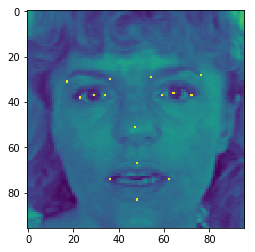

In [31]:
n = 54
show_image_labels(Xtrain[n], Ytrain[n])

Now we're ready to take a closer look at some of the data.

## Missing Values
What do these missing values mean for our data set? Can we intuitively understand what is going on with these values?

In [32]:
nas = train_data.isna()
nas.sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [33]:
na_rows_inds = nas.any(axis=1)
na_rows = train_data[na_rows_inds]
na_rows.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
210,65.365120,39.988480,28.251520,37.399680,59.322880,40.851840,71.982080,41.715200,33.717760,38.550400,...,61.278720,57.884800,87.459200,34.293120,85.157760,46.376960,79.116160,NaN,NaN,181 56 47 59 65 71 86 66 32 22 17 7 8 12 13 14...
350,67.258311,37.229867,26.980267,36.270862,60.225422,37.549511,74.291200,37.549511,34.333156,36.590507,...,62.163911,57.028978,86.778311,36.251022,87.097600,45.201778,79.106133,NaN,NaN,59 41 36 32 32 31 33 41 55 72 79 70 64 50 52 6...
499,65.783008,41.160992,29.971041,37.969983,60.464132,41.160992,71.455736,42.224926,35.289917,39.388562,...,58.180760,56.918479,85.482843,28.197818,81.937190,45.926876,75.554380,NaN,NaN,118 127 122 109 129 154 158 148 147 152 136 13...
512,68.286689,38.490807,31.361311,38.490807,61.604459,39.194125,74.264656,38.842466,35.933115,38.490807,...,59.590820,64.770098,82.800787,33.823475,82.449049,48.241574,71.547541,NaN,NaN,194 194 194 191 194 191 191 183 166 151 126 86...
810,72.376354,37.281897,24.536920,35.003894,64.187469,37.314945,79.589947,39.180234,33.269522,36.142896,...,57.784269,65.161912,83.222655,28.713345,82.463150,47.420602,77.785827,NaN,NaN,124 124 126 128 131 134 136 141 141 139 138 14...


In [38]:
# get training data 
Ytrain_total, Xtrain_total = trainDataLabelSplit(train_data)

np.random.seed(0)
# split train data into train and dev
split_pct = 1
split_num = int(len(Xtrain_total)*split_pct)
inds = np.random.permutation(len(Xtrain_total)) #randomize partition to help account for non-random ingestion/storage of data
train_inds = inds[:split_num]
dev_inds = inds[split_num+1:]
# define train and dev data
Xtrain = Xtrain_total[train_inds]
Ytrain = Ytrain_total[train_inds]
# Xdev = Xtrain_total[dev_inds]
# Ydev = Ytrain_total[dev_inds]

0: 0.00900 seconds elapsed.
500: 2.79835 seconds elapsed.
1000: 5.72791 seconds elapsed.
1500: 8.51582 seconds elapsed.
2000: 11.47626 seconds elapsed.
2500: 14.40074 seconds elapsed.
3000: 17.32129 seconds elapsed.
3500: 20.29780 seconds elapsed.
4000: 23.14196 seconds elapsed.
4500: 26.23793 seconds elapsed.
5000: 29.38037 seconds elapsed.
5500: 32.21588 seconds elapsed.
6000: 35.15422 seconds elapsed.
6500: 38.04929 seconds elapsed.
7000: 41.05555 seconds elapsed.


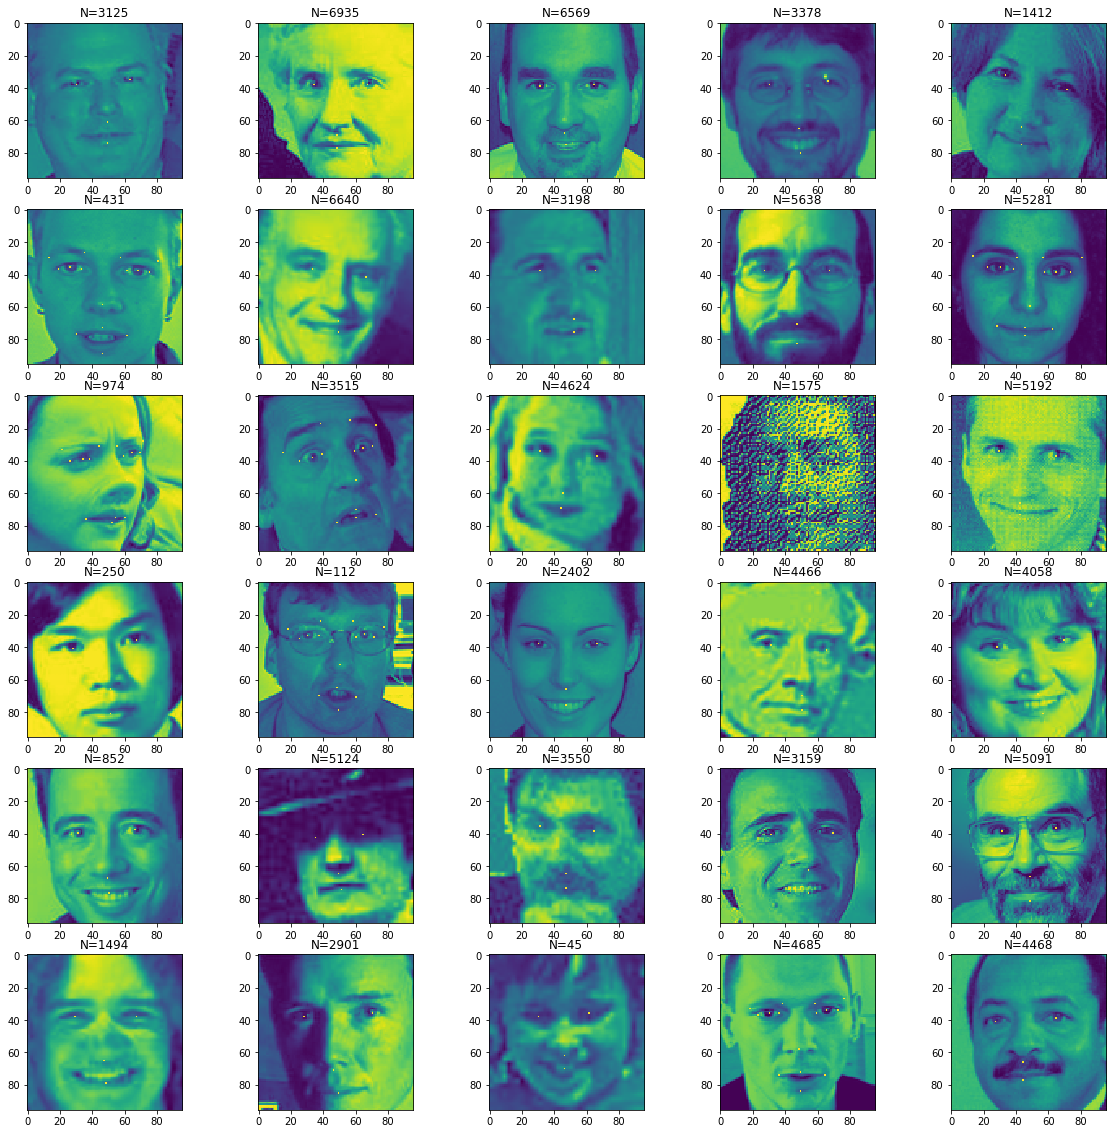

In [39]:
rows = 6
cols = 5

inds = np.random.choice(a=len(Xtrain), size=rows*cols, replace=False)
plt.subplots(figsize=(20,20),nrows=rows, ncols=cols)

for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.title(('N='+str(inds[i])))
    show_image_labels(Xtrain[inds[i]], Ytrain[inds[i]])

plt.show()



**Potentially interesting to look at:**
* distribution of the pixel values in 2D (where do we see concentrations?)
* distribution of the feature values in 2D

### Pixel Value Distributions
To get an idea about our data set, we can see what the densities are like for the image set. This can be accomplished by summing all the pixel values and plotting these. The imshow() command will automatically scale these representing a density plot.

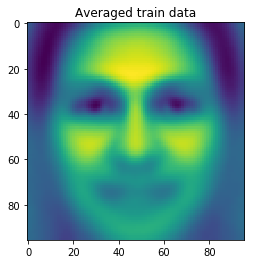

In [43]:
# To look at image densities, we "overlay" them by summing all the values at each pixel. 
# Higher values will show higher densities overall.

pixel_sums_train = np.zeros((96,96))
# pixel_sums_dev = np.zeros((96,96))

for r in range(96):
    for c in range(96):
        pixel_sums_train[r,c] = np.sum(Xtrain[:,r,c,0]/255)
#         pixel_sums_dev[r,c] = np.sum(Xdev[:,r,c,0]/255)

# plt.subplot(1,2,1)
plt.title("Averaged train data")
plt.imshow(pixel_sums_train, cmap='viridis')
# plt.subplot(1,2,2)
# plt.title("Average dev data")
# plt.imshow(pixel_sums_dev, cmap='viridis')

This plot shows a few interesting points. The forehead, eyes, nose and cheeks are quite distinct, meaning that the majority of our images are centered in approximately the same location. The blurring above the lips and around the mouth area is likely due to mustaches, smiles vs frowns, etc. We can also see that our training and test sets generated similar images, so we should expect our model to perform relatively well to the test data set, though generalizability is something we'll need to look out for.

Based on this, one could assume that the a model may be more accurate with predictions of where the eyes and nose are, while having poorer accuracy with the mouth and potentially the ends of the eyebrows.

### Facial Keypoints Distributions

To take a deeper look at our dataset, we investigate where we our keypoints generally lie. This will help to identify any outlier images, and reinfornce the observations made in the previous step with the heatmaps.

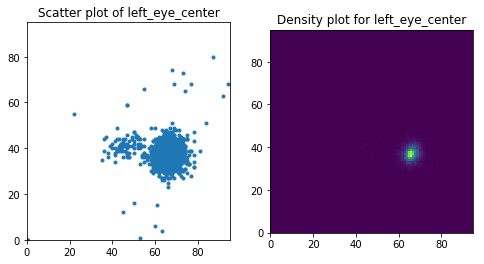

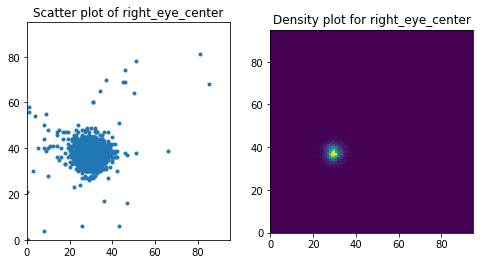

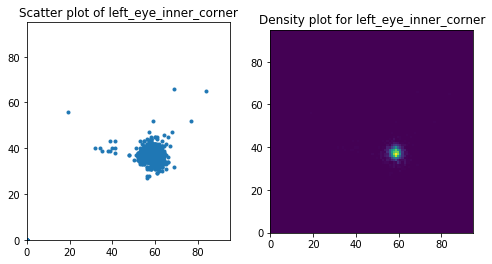

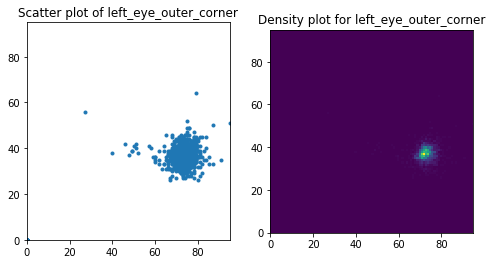

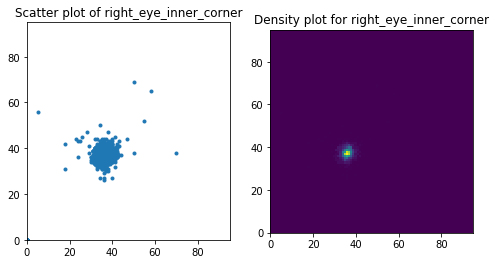

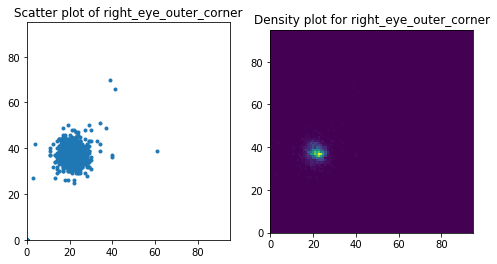

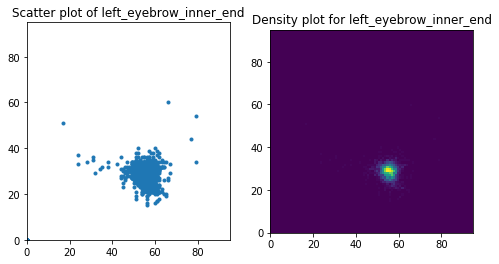

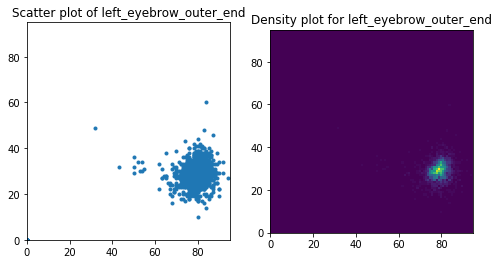

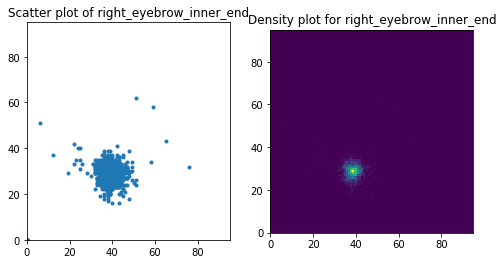

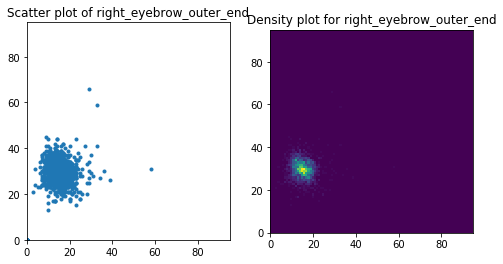

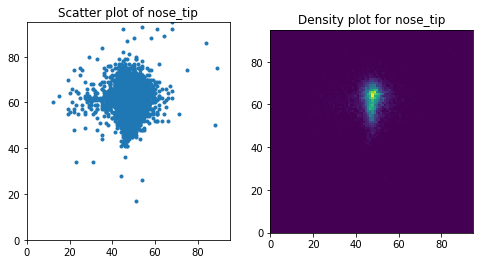

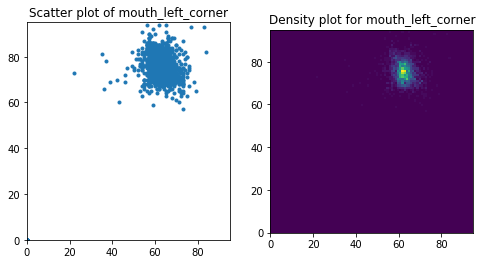

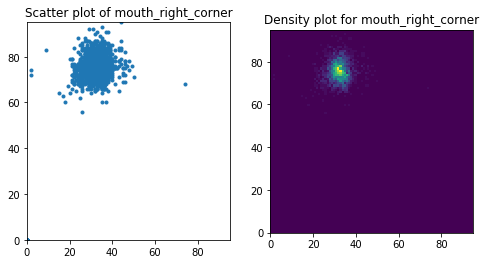

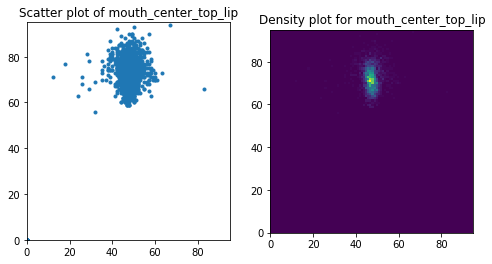

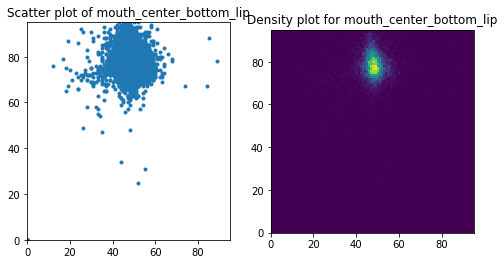

In [44]:
IMG_H = IMG_W = 96

def get_feature_density(feature_ind, label_array):
    feature_density = np.zeros((IMG_H, IMG_W))
    for i in range(len(label_array)):
        c = Ytrain[i,feature_ind]
        r = Ytrain[i,feature_ind+1]
        if ~np.isnan(r) and ~np.isnan(c):
            feature_density[int(r),int(c)] += 1
    return feature_density


column_list=list(train_data.columns.values)
for i in range(0,30,2):
    # Scatter plot of ALL values for each feature (in X and Y)
    plt.figure(figsize=(8,4))
    ax1 = plt.subplot(1,2,1)
    ax1.scatter(x=Ytrain[:,i].astype('int8'), y=Ytrain[:,i+1].astype('int8'), marker='.')
    ax1.set_xlim(0,IMG_W-1)
    ax1.set_ylim(0,IMG_H-1)
    ax1.set_title(('Scatter plot of '+column_list[i][:-2]))

    # View the same data as a density plot:
    ax2 = plt.subplot(1,2,2)
    ax2.imshow(get_feature_density(i,Ytrain), cmap='viridis')
    ax2.set_xlim(0,IMG_W-1)
    ax2.set_ylim(0,IMG_H-1)
    ax2.set_title(('Density plot for '+column_list[i][:-2]))

    plt.show()

We can see that although the features take on a variety of values, they are mostly clustered around a smaller set of points (with few outliers). This aligns with the findings above where we saw the "average" image for our data set.

# Training a Baseline Neural Net Model

Although we have been looking at the complete data set (including training exmaples where some features do not exist), for the purposes of training a model we need to clean out the NaNs and null values.

Let's try codifying the null values to -1 to see how the model handles fitting these.

In [45]:
train2 = train_data.copy()

In [46]:
train2.fillna(value=-1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
5,69.680748,39.968748,29.183551,37.563364,62.864299,40.169271,76.898243,41.171888,36.401047,39.367626,...,58.800000,64.869084,82.471178,31.990430,81.669084,49.308112,78.487626,49.432374,93.898766,167 169 170 167 156 145 106 68 52 24 20 15 21 ...
6,64.131866,34.290040,29.578953,33.138040,57.797154,35.154040,69.026577,34.290040,34.761664,33.714040,...,53.006174,55.781799,70.570953,33.898309,70.282953,45.127732,65.099597,45.415732,78.057020,109 109 125 141 145 139 120 81 45 34 31 35 36 ...
7,67.468893,39.413452,29.355961,39.621717,59.554951,40.454773,75.591612,40.038245,37.478214,40.454773,...,56.907961,66.843961,80.025786,30.189204,81.275184,48.100194,71.278602,48.516816,91.063922,178 177 178 179 179 179 181 185 188 184 192 20...
8,65.802880,34.755200,27.475840,36.185600,58.652160,37.329280,72.952960,35.899520,36.342400,37.043200,...,55.348480,65.516800,73.368320,31.194240,74.798080,49.213440,67.648000,49.499520,83.093120,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...
9,64.121231,36.740308,29.468923,38.390154,58.620923,37.840615,71.272000,37.290338,36.344615,39.490462,...,54.341538,65.771692,69.192615,32.769231,72.217846,49.270154,67.542769,49.545231,76.893538,226 227 225 224 221 220 215 210 210 208 206 18...


In [51]:
Ytrain_m, Xtrain_m = trainDataLabelSplit(train2)

0: 0.00700 seconds elapsed.
500: 3.21800 seconds elapsed.
1000: 6.28218 seconds elapsed.
1500: 9.21014 seconds elapsed.
2000: 12.15642 seconds elapsed.
2500: 15.09609 seconds elapsed.
3000: 18.09155 seconds elapsed.
3500: 21.01429 seconds elapsed.
4000: 23.87276 seconds elapsed.
4500: 26.83014 seconds elapsed.
5000: 29.73420 seconds elapsed.
5500: 32.61195 seconds elapsed.
6000: 35.61236 seconds elapsed.
6500: 38.61412 seconds elapsed.
7000: 41.47223 seconds elapsed.


Next, let's try training a model on this new data set.

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, Input, Dense
from keras.models import Model

m = Sequential()
m.add(Flatten(input_shape = Xtrain_m[1].shape))

m.add(Dense(128, activation = 'relu'))
m.add(Dense(64, activation = 'relu'))
m.add(Dense(30))

m.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'acc'])

In [53]:
m.fit(Xtrain_m1, Ytrain_m1, epochs = 10, batch_size=50)

Epoch 1/10
7049/7049 [==============================] - 2s 338us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 2/10
7049/7049 [==============================] - 2s 274us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 3/10
7049/7049 [==============================] - 2s 253us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 4/10
7049/7049 [==============================] - 2s 272us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 5/10
7049/7049 [==============================] - 2s 242us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 6/10
7049/7049 [==============================] - 2s 262us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 7/10
7049/7049 [==============================] - 2s 255us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 8/10
7049/7049 [==============================] - 2s 255us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 9/10
7049/7049 [==

These results aren't good. Let's try removing all the values with a blanket `.dropna()` and retraining the model.

In [56]:
# get training data 
Ytrain_total_clean, Xtrain_total_clean = trainDataLabelSplit(train_data.dropna())

np.random.seed(0)
split_pct = 1
# split train data into train and dev
split_num = int(len(Xtrain_total_clean)*split_pct)
inds = np.random.permutation(len(Xtrain_total_clean)) #randomize partition to help account for non-random ingestion/storage of data
train_inds = inds[:split_num]
# dev_inds = inds[split_num+1:]
# define train and dev data
Xtrain_clean = Xtrain_total_clean[train_inds]
Ytrain_clean = Ytrain_total_clean[train_inds]
# Xdev_clean = Xtrain_total_clean[dev_inds]
# Ydev_clean = Ytrain_total_clean[dev_inds]

0: 0.00900 seconds elapsed.
500: 3.00900 seconds elapsed.
1000: 5.88051 seconds elapsed.
1500: 8.86931 seconds elapsed.
2000: 11.82715 seconds elapsed.


In [78]:
m1_clean = Sequential()
m1_clean.add(Flatten(input_shape = Xtrain_clean[1].shape))

m1_clean.add(Dense(128, activation = 'relu'))
m1_clean.add(Dense(64, activation = 'relu'))
m1_clean.add(Dense(30))

m1_clean.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'acc'])

In [84]:
m1_clean.fit(Xtrain_clean, Ytrain_clean, epochs = 30, batch_size=10)

Epoch 1/30
2140/2140 [==============================] - 2s 732us/step - loss: 91.1544 - mean_squared_error: 91.1544 - acc: 0.5967
Epoch 2/30
2140/2140 [==============================] - 2s 779us/step - loss: 82.5724 - mean_squared_error: 82.5724 - acc: 0.5911
Epoch 3/30
2140/2140 [==============================] - 2s 727us/step - loss: 82.0087 - mean_squared_error: 82.0087 - acc: 0.5720
Epoch 4/30
2140/2140 [==============================] - 2s 716us/step - loss: 78.2423 - mean_squared_error: 78.2423 - acc: 0.5444
Epoch 5/30
2140/2140 [==============================] - 2s 726us/step - loss: 79.5534 - mean_squared_error: 79.5534 - acc: 0.5738
Epoch 6/30
2140/2140 [==============================] - 2s 748us/step - loss: 82.9467 - mean_squared_error: 82.9467 - acc: 0.5411
Epoch 7/30
2140/2140 [==============================] - 1s 692us/step - loss: 81.9759 - mean_squared_error: 81.9759 - acc: 0.5827
Epoch 8/30
2140/2140 [==============================] - 1s 700us/step - loss: 94.1670 - me

These results are much better, though there is still a lot of improvement we can make. For now, we can stick with the clean data as a baseline.

# Dimensionality Reduction

In [107]:
# lets perform principal component analysis on the data
from sklearn.decomposition import PCA

# reshape data from matrix into single vector of size 9216 (96x96) and normalize to range [0,1]
Xtrain_reshape = Xtrain.reshape((len(Xtrain), np.prod(Xtrain.shape[1:]))) / 255
Xtrain_reshape_clean = Xtrain_clean.reshape((len(Xtrain_clean), np.prod(Xtrain_clean.shape[1:]))) / 255
# fit up to 400 componenets
pca = PCA(n_components=400)
pca.fit(Xtrain_reshape)

pca_clean = PCA(n_components=400)
pca_clean.fit(Xtrain_reshape_clean)

PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

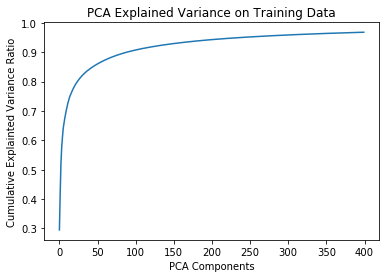

In [108]:
# plot the cumulative variance ratio for PCA components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA Explained Variance on Training Data")
plt.xlabel("PCA Components")
plt.ylabel("Cumulative Explainted Variance Ratio")

In [109]:
np.cumsum(pca.explained_variance_ratio_)[100]

0.90796432109656322

In [110]:
np.cumsum(pca_clean.explained_variance_ratio_)[100]

0.91502969205014306

Looks like we can get away with about 100 PCA components to explain a good portion of the model's variance of our training data.

In [112]:
# fit pca to the training data
PCA_COMPONENTS = 100
pca = PCA(n_components=PCA_COMPONENTS)
Xtrain_pca = pca.fit_transform(Xtrain_reshape)
# Xdev_pca = pca.transform(Xdev_reshape)
pca_clean = PCA(n_components=PCA_COMPONENTS)
Xtrain_clean_pca = pca_clean.fit_transform(Xtrain_reshape_clean)

In [121]:
# lets revert the PCA'd images 
Xtrain_pca_invert = pca_clean.inverse_transform(Xtrain_clean_pca)
Xtrain_pca_invert = Xtrain_pca_invert*255
Xtrain_pca_invert = Xtrain_pca_invert.reshape(len(Xtrain_pca_invert), IMG_W, IMG_H, 1)

Let's take a look at what the images now look like after being transformed through PCA.

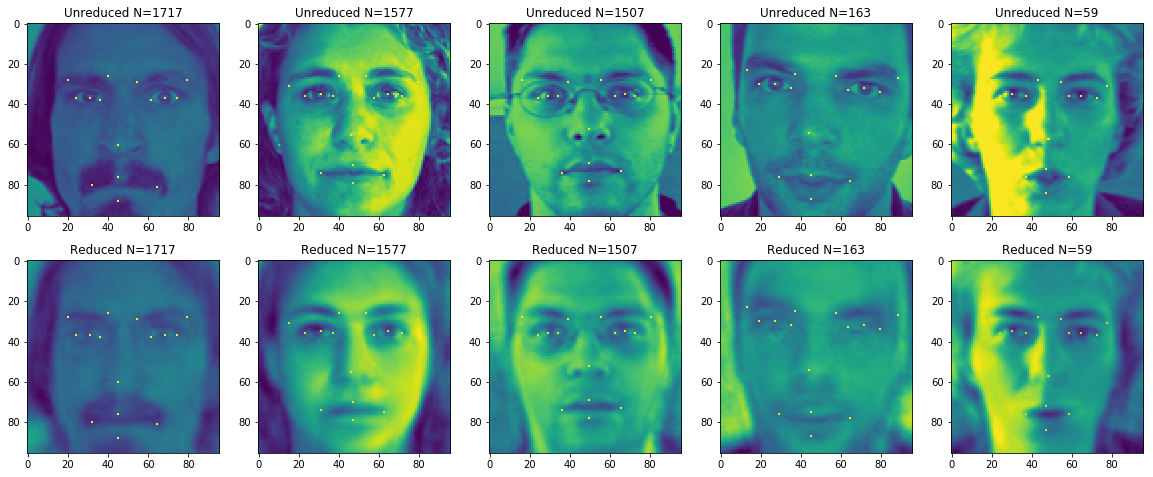

In [122]:
rows = 2
cols = 5

inds = np.random.choice(a=len(Xtrain_clean), size=rows*cols, replace=False)
plt.subplots(figsize=(20,8),nrows=rows, ncols=cols)

for i in range(int(rows*cols/2)):
    plt.subplot(rows,cols,i+1)
    plt.title(('Unreduced N='+str(inds[i])))
    show_image_labels(Xtrain_clean[inds[i]], Ytrain_clean[inds[i]])
    
    plt.subplot(rows,cols,i+1+cols)
    plt.title(('Reduced N='+str(inds[i])))
    show_image_labels(Xtrain_pca_invert[inds[i]], Ytrain_clean[inds[i]])

plt.show()

We can see that the pricipal components left seem to explain most of the facial keypoints. Other items, such as glasses appear to be removed.

In [127]:
# rerun baseline model with PCA input
m2_clean = Sequential()
m2_clean.add(Flatten(input_shape = Xtrain_pca_invert[1].shape))

m2_clean.add(Dense(128, activation = 'relu'))
m2_clean.add(Dense(64, activation = 'relu'))
m2_clean.add(Dense(30))

m2_clean.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'acc'])

In [128]:
m2_clean.fit(Xtrain_pca_invert, Ytrain_clean, epochs = 30, batch_size=10)

Epoch 1/30
2140/2140 [==============================] - 3s 1ms/step - loss: 4222.0379 - mean_squared_error: 4222.0379 - acc: 0.0107
Epoch 2/30
2140/2140 [==============================] - 2s 828us/step - loss: 370.6339 - mean_squared_error: 370.6339 - acc: 0.2785
Epoch 3/30
2140/2140 [==============================] - 2s 895us/step - loss: 152.5240 - mean_squared_error: 152.5240 - acc: 0.4617
Epoch 4/30
2140/2140 [==============================] - 2s 912us/step - loss: 213.3214 - mean_squared_error: 213.3214 - acc: 0.4215
Epoch 5/30
2140/2140 [==============================] - 2s 839us/step - loss: 116.3958 - mean_squared_error: 116.3958 - acc: 0.5117
Epoch 6/30
2140/2140 [==============================] - 2s 832us/step - loss: 202.4052 - mean_squared_error: 202.4052 - acc: 0.4402
Epoch 7/30
2140/2140 [==============================] - 2s 823us/step - loss: 150.5536 - mean_squared_error: 150.5536 - acc: 0.4416
Epoch 8/30
2140/2140 [==============================] - 2s 836us/step - loss

# Adding Simulated Data to Training Set

Based on the properties of our data, we can simulate more images to expand the size of our training set by mirroring or rotating objects in our set.

### Flipping Images

By mirroring all the training data, we could double the size our training set.

In [60]:
# lets mirror our training data and labels
def flip_data(X, Y):
    Xtrain_flipped = X.copy()
    Ytrain_flipped = Y.copy()
    # flip the x values for the pixel values of the images
    Xtrain_flipped = Xtrain_flipped[:,:,::-1,:]
    # flip the x values for the keypoint locations
    Ytrain_flipped = Ytrain_flipped.reshape(len(Ytrain_flipped),15,2)
    Ytrain_flipped[:,:,0] = Ytrain_flipped[:,:,0] - 2*(Ytrain_flipped[:,:,0] - (IMG_W/2))
    # ensure labels are correct
    for row in Ytrain_flipped:
        row[[0,1]] = row[[1,0]]
        row[[2,4]] = row[[4,2]]
        row[[3,5]] = row[[5,3]]
        row[[6,8]] = row[[8,6]]
        row[[7,9]] = row[[9,7]]
        row[[11,12]] = row[[12,11]]
    Ytrain_flipped = Ytrain_flipped.reshape(Y.shape)

    return Xtrain_flipped, Ytrain_flipped

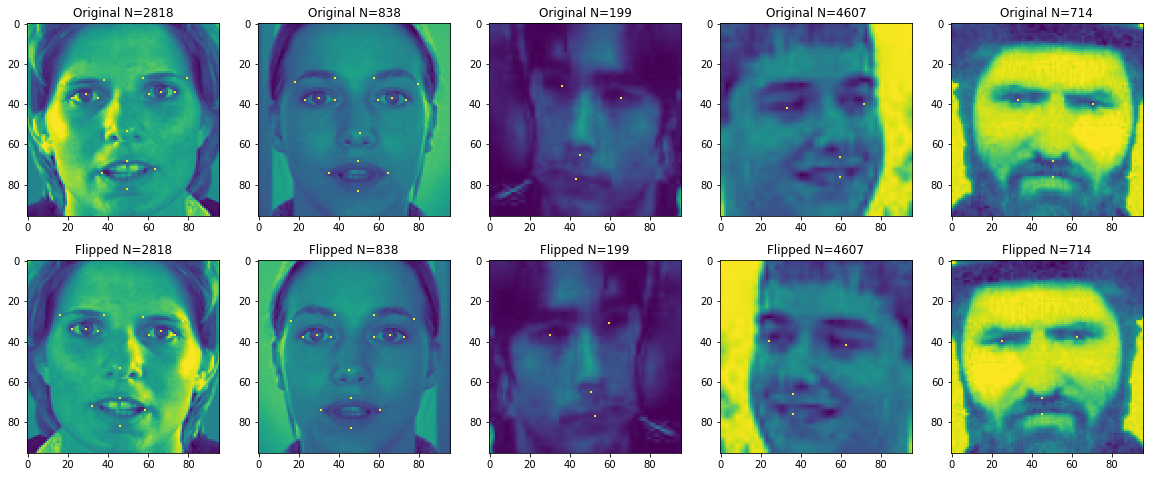

In [61]:
rows = 2
cols = 5
inds = np.random.choice(a=len(Xtrain), size=rows*cols, replace=False)
plt.subplots(figsize=(20,8),nrows=rows, ncols=cols)

Xtrain_flipped, Ytrain_flipped = flip_data(Xtrain, Ytrain)
for i in range(int(rows*cols/2)):
    plt.subplot(rows,cols,i+1)
    plt.title(('Original N='+str(inds[i])))
    show_image_labels(Xtrain[inds[i]], Ytrain[inds[i]])
    
    plt.subplot(rows,cols,i+1+cols)
    plt.title(('Flipped N='+str(inds[i])))
    show_image_labels(Xtrain_flipped[inds[i]], Ytrain_flipped[inds[i]])

plt.show()

In [73]:
# add flipped images to dataset
Xtrain_flippedall = np.concatenate((Xtrain, Xtrain_flipped), axis=0)
Ytrain_flippedall = np.concatenate((Ytrain, Ytrain_flipped), axis=0)

# check to see if flipped images successfully added to dataset
print(Xtrain.shape)
print(Xtrain_flipped.shape)
print(Xtrain_flippedall.shape)
print(Ytrain.shape)
print(Ytrain_flipped.shape)
print(Ytrain_flippedall.shape)

Xtrain_clean_flipped, Ytrain_clean_flipped = flip_data(Xtrain_clean, Ytrain_clean)
# add flipped images to na dataset
Xtrain_clean_flippedall = np.concatenate((Xtrain_clean, Xtrain_clean_flipped), axis=0)
Ytrain_clean_flippedall = np.concatenate((Ytrain_clean, Ytrain_clean_flipped), axis=0)
print(Xtrain_clean.shape)
print(Xtrain_clean_flipped.shape)
print(Xtrain_clean_flippedall.shape)
print(Ytrain_clean_flippedall.shape)

(7049, 96, 96, 1)
(7049, 96, 96, 1)
(14098, 96, 96, 1)
(7049, 30)
(7049, 30)
(14098, 30)
(2140, 96, 96, 1)
(2140, 96, 96, 1)
(4280, 96, 96, 1)
(4280, 30)


In [80]:
# lets compare to the baseline model
m3_clean = Sequential()
m3_clean.add(Flatten(input_shape = Xtrain_clean_flippedall[1].shape))

m3_clean.add(Dense(128, activation = 'relu'))
m3_clean.add(Dense(64, activation = 'relu'))
m3_clean.add(Dense(30))

m3_clean.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'acc'])

In [83]:
m3_clean.fit(Xtrain_clean_flippedall, Ytrain_clean_flippedall, epochs = 30, batch_size=10)

Epoch 1/30
4280/4280 [==============================] - 3s 686us/step - loss: 82.0203 - mean_squared_error: 82.0203 - acc: 0.6654
Epoch 2/30
4280/4280 [==============================] - 3s 691us/step - loss: 163.3548 - mean_squared_error: 163.3548 - acc: 0.5498
Epoch 3/30
4280/4280 [==============================] - 3s 703us/step - loss: 77.2433 - mean_squared_error: 77.2433 - acc: 0.5939
Epoch 4/30
4280/4280 [==============================] - 3s 721us/step - loss: 72.8869 - mean_squared_error: 72.8869 - acc: 0.6047
Epoch 5/30
4280/4280 [==============================] - 3s 711us/step - loss: 74.1764 - mean_squared_error: 74.1764 - acc: 0.6126
Epoch 6/30
4280/4280 [==============================] - 3s 733us/step - loss: 68.8353 - mean_squared_error: 68.8353 - acc: 0.6556
Epoch 7/30
4280/4280 [==============================] - 3s 710us/step - loss: 69.3839 - mean_squared_error: 69.3839 - acc: 0.6703
Epoch 8/30
4280/4280 [==============================] - 3s 710us/step - loss: 68.7690 - 

It doesn't appear that our accuracy improves too much with the flipped data, but our RMSE appears to have been reduced about 10 units over 30 epochs. The extra training data does seem like it would be worthwhile to add to future models.

### Rotating Images

Based on the extra variability seen in the datapoints for features far from the center of each picture, it may increase model accuracy if we can train on images rotated along the center of the picture.

In [132]:
from scipy.ndimage import rotate

"""
Method to take X numpy array of pixel values, Y numpy array of keypoint coordinates and rotation degrees
@return: the X and Y data rotated the degrees specified
"""
def rotate_data(X, Y, max_degrees):
    # copy x and y
    Xtrain_flippedall_rotated = X.copy()
    Ytrain_flippedall_rotated = Y.copy()

    #define constants with which to rotate image and keypoints
    origin = [int(IMG_W/2), int(IMG_H/2)]

    # rotate each image
    for i in list(range(len(Xtrain_flippedall_rotated))):
        theta = np.random.randint(-max_degrees, max_degrees)
        theta_rad = np.radians(360 - theta)

        # rotate image and fill empty space with mean of all pixel values in image
        Xtrain_flippedall_rotated[i][:,:,0] = rotate(Xtrain_flippedall_rotated[i][:,:,0],theta,reshape=False, mode='constant', cval=np.mean(Xtrain_flippedall_rotated[i][:,:,0],))
        # rotate keypoint locations
        points = Ytrain_flippedall_rotated[i].reshape(15,2)
        points_x = origin[0] + np.cos(theta_rad) * (points[:,0] - origin[0]) - np.sin(theta_rad) * (points[:,1] - origin[1])
        points_y = origin[1] + np.sin(theta_rad) * (points[:,0] - origin[0]) + np.cos(theta_rad) * (points[:,1] - origin[1])
        Ytrain_flippedall_rotated[i] = np.column_stack((points_x, points_y)).reshape(30)
    
    return Xtrain_flippedall_rotated, Ytrain_flippedall_rotated

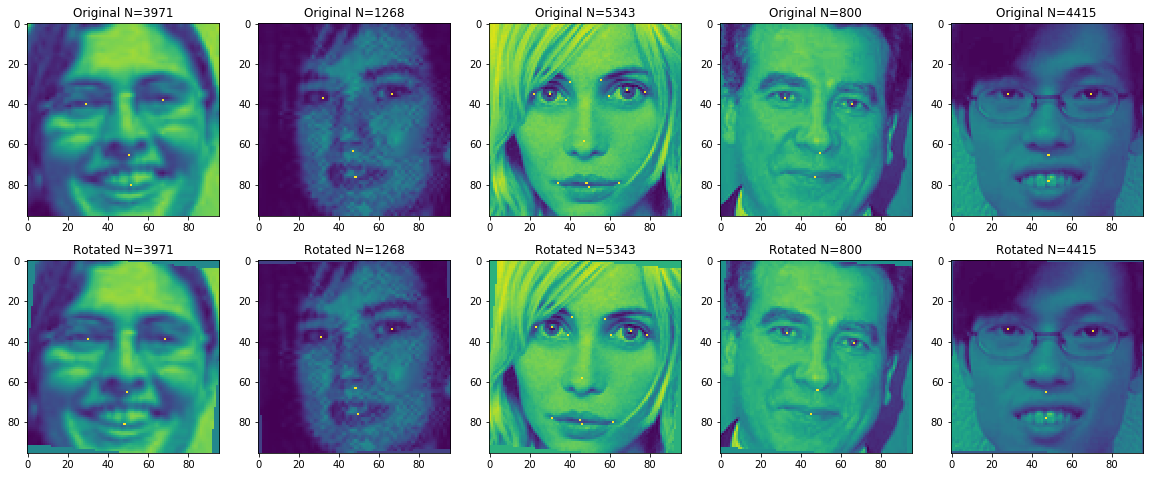

In [133]:
rows = 2
cols = 5
inds = np.random.choice(a=len(Xtrain), size=rows*cols, replace=False)
plt.subplots(figsize=(20,8),nrows=rows, ncols=cols)

Xtrain_flippedrotatedall, Ytrain_flippedrotatedall = rotate_data(Xtrain_flippedall,Ytrain_flippedall, max_degrees=5)
for i in range(int(rows*cols/2)):
    plt.subplot(rows,cols,i+1)
    plt.title(('Original N='+str(inds[i])))
    show_image_labels(Xtrain[inds[i]], Ytrain[inds[i]])
    
    plt.subplot(rows,cols,i+1+cols)
    plt.title(('Rotated N='+str(inds[i])))
    show_image_labels(Xtrain_flippedrotatedall[inds[i]], Ytrain_flippedrotatedall[inds[i]])

plt.show()

In [138]:
Xtrain_clean_rotated, Ytrain_clean_rotated = rotate_data(Xtrain_clean, Ytrain_clean, max_degrees=5)

In [141]:
# lets compare to the baseline model to our randomly rotated 5 degree model
m4_clean = Sequential()
m4_clean.add(Flatten(input_shape = Xtrain_clean_rotated[1].shape))

m4_clean.add(Dense(128, activation = 'relu'))
m4_clean.add(Dense(64, activation = 'relu'))
m4_clean.add(Dense(30))

m4_clean.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'acc'])

In [142]:
m4_clean.fit(Xtrain_clean_rotated, Ytrain_clean_rotated, epochs = 30, batch_size=10)

Epoch 1/30
2140/2140 [==============================] - 4s 2ms/step - loss: 3125.2669 - mean_squared_error: 3125.2669 - acc: 0.1715
Epoch 2/30
2140/2140 [==============================] - 2s 1ms/step - loss: 229.4005 - mean_squared_error: 229.4005 - acc: 0.2710
Epoch 3/30
2140/2140 [==============================] - 2s 915us/step - loss: 195.2550 - mean_squared_error: 195.2550 - acc: 0.3089
Epoch 4/30
2140/2140 [==============================] - 2s 943us/step - loss: 196.5863 - mean_squared_error: 196.5863 - acc: 0.2766
Epoch 5/30
2140/2140 [==============================] - 2s 898us/step - loss: 155.9869 - mean_squared_error: 155.9869 - acc: 0.3206
Epoch 6/30
2140/2140 [==============================] - 2s 909us/step - loss: 223.2469 - mean_squared_error: 223.2469 - acc: 0.3369
Epoch 7/30
2140/2140 [==============================] - 2s 887us/step - loss: 127.6198 - mean_squared_error: 127.6198 - acc: 0.4037
Epoch 8/30
2140/2140 [==============================] - 2s 860us/step - loss: 

It appears that just rotating the data does not give us more accuracy or a reduction in RMSE, but we could still use it to add simulated extra data to our training set.

# Tuning our Baseline Model

The baseline NN we started with had very little hyperparameter tuning. Let's see if we can improve things a bit by tuning some of the parameters.

## Activation Function

First, we'll try using a different activation function for the fully connencted layers, and add a dropout layer to improve generalizability.

ReLu is nonlinear in nature. We wanted to try a non-linear activation to see if we can get better result. Since the Tanh function is great when we stack layers, we give it a try below.

In [143]:
# Configure Model with activation of tanh
model2 = keras.Sequential([keras.layers.Flatten(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,1)),
                         keras.layers.Dense(128, activation="tanh"),
                         keras.layers.Dropout(0.1),
                         keras.layers.Dense(64, activation="tanh"),
                         keras.layers.Dense(30)
                         ])
# Compile model
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='mse',
              metrics=['accuracy'])
# Train model
model2.fit(Xtrain_clean, Ytrain_clean, epochs = 20, batch_size=10)

Epoch 1/20
2140/2140 [==============================] - 2s 926us/step - loss: 1941.4695 - acc: 0.0350
Epoch 2/20
2140/2140 [==============================] - 1s 500us/step - loss: 1100.4494 - acc: 0.0318
Epoch 3/20
2140/2140 [==============================] - 1s 506us/step - loss: 613.5250 - acc: 0.0318
Epoch 4/20
2140/2140 [==============================] - 1s 504us/step - loss: 335.0053 - acc: 0.0318
Epoch 5/20
2140/2140 [==============================] - 1s 495us/step - loss: 178.3814 - acc: 0.3243
Epoch 6/20
2140/2140 [==============================] - 1s 496us/step - loss: 92.6625 - acc: 0.7051
Epoch 7/20
2140/2140 [==============================] - 1s 515us/step - loss: 47.9072 - acc: 0.7051
Epoch 8/20
2140/2140 [==============================] - 1s 491us/step - loss: 26.0358 - acc: 0.7051
Epoch 9/20
2140/2140 [==============================] - 1s 540us/step - loss: 16.2187 - acc: 0.7051
Epoch 10/20
2140/2140 [==============================] - 1s 545us/step - loss: 12.2345 - acc:

For our case, the Tanh function made little difference to the overall accuracy score.

## Optimizer Functions

Next we look at whether using a different optimizer function would help us improve our results. We used the Adam optimizer in our base model which is very popular optimizer in Keras. For comparison, we test the GradientDescentOptimizer.

In [144]:
# Configure Model with activation of relu and GD optimizer
model2 = keras.Sequential([keras.layers.Flatten(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,1)),
                         keras.layers.Dense(128, activation="relu"),
                         keras.layers.Dropout(0.1),
                         keras.layers.Dense(64, activation="relu"),
                         keras.layers.Dense(30)
                         ])
# Compile model
model2.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=1), 
              loss='mse',
              metrics=['accuracy'])
# Train model
model2.fit(Xtrain_clean, Ytrain_clean, epochs = 20, batch_size=10)

Epoch 1/20
2140/2140 [==============================] - 2s 862us/step - loss: nan - acc: 0.0042
Epoch 2/20
2140/2140 [==============================] - 1s 427us/step - loss: nan - acc: 0.0000e+00
Epoch 3/20
2140/2140 [==============================] - 1s 456us/step - loss: nan - acc: 0.0000e+00
Epoch 4/20
2140/2140 [==============================] - 1s 450us/step - loss: nan - acc: 0.0000e+00
Epoch 5/20
2140/2140 [==============================] - 1s 451us/step - loss: nan - acc: 0.0000e+00
Epoch 6/20
2140/2140 [==============================] - 1s 450us/step - loss: nan - acc: 0.0000e+00
Epoch 7/20
2140/2140 [==============================] - 1s 458us/step - loss: nan - acc: 0.0000e+00
Epoch 8/20
2140/2140 [==============================] - 1s 491us/step - loss: nan - acc: 0.0000e+00
Epoch 9/20
2140/2140 [==============================] - 1s 455us/step - loss: nan - acc: 0.0000e+00
Epoch 10/20
2140/2140 [==============================] - 1s 458us/step - loss: nan - acc: 0.0000e+00
Epo

The results of changing the optimizer from Adam to GradientDescentOptimizer are very small, with the overall accuracy of the training increasing only slightly.

## Changing Dropout Rates

In the below model, we increase dropout rate. Dropout is a technique where randomly selected neurons are ignored during training. As these nodes “dropped-out” randomly, the network becomes less sensitive to the specific weights of neurons and we expect better generalization and lesser overfitting.

In [145]:
# Configure Model with activation of relu and higher dropout rate than base model
model2 = keras.Sequential([keras.layers.Flatten(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,1)),
                         keras.layers.Dense(128, activation="relu"),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(64, activation="relu"),
                         keras.layers.Dense(30)
                         ])
# Compile model
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='mse',
              metrics=['accuracy'])
# Train model
model2.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
7049/7049 [==============================] - 3s 371us/step - loss: nan - acc: 0.0075
Epoch 2/10
7049/7049 [==============================] - 2s 268us/step - loss: nan - acc: 0.0074
Epoch 3/10
7049/7049 [==============================] - 2s 255us/step - loss: nan - acc: 0.0074
Epoch 4/10
7049/7049 [==============================] - 2s 237us/step - loss: nan - acc: 0.0074
Epoch 5/10
7049/7049 [==============================] - 2s 251us/step - loss: nan - acc: 0.0074
Epoch 6/10
7049/7049 [==============================] - 2s 237us/step - loss: nan - acc: 0.0074
Epoch 7/10
7049/7049 [==============================] - 2s 244us/step - loss: nan - acc: 0.0074
Epoch 8/10
7049/7049 [==============================] - 2s 233us/step - loss: nan - acc: 0.0074
Epoch 9/10
7049/7049 [==============================] - 2s 247us/step - loss: nan - acc: 0.0074
Epoch 10/10
7049/7049 [==============================] - 2s 240us/step - loss: nan - acc: 0.0074


After we run the model, we get a better accuracy score compared to the based model.

From this testing, we see improvements using a dropout model and a gradient descent optimizer. We should explore using it in our final model. 

# Improving Modelling with Transfer Learning 

Image recognition / classification is not a new problem, and there are plenty of famous image data sets and models trained on such data sets that we can benefit from by using transfer learning. 

To do this, we'll have to first train a model that we can transfer weights into - since most of these are ConvNets, we'll need a new baseline. Next, we'll need to get model weights from a trained model and transfer them in. 

We propose using the VGG16 model (trained on ImageNet) from the Keras library. The original paper for this model can be found here: https://arxiv.org/pdf/1409.1556.pdf

## Training a more sophisticated model - a ConvNet

Let's first try a (slightly modified) example model from the Keras documentation to set a baseline for performance (accuracy). The Keras library has a number of exmaple models to get started with ConvNets which are trained on the CIFAR image sets. Since we're not exactly interested in the data set, we'll just use the architecture as a starting point for our investigation.

In [146]:
cifar = Sequential()
cifar.add(Conv2D(32, (3, 3), padding='same', input_shape=Xtrain[1].shape))
cifar.add(Activation('relu'))
cifar.add(Conv2D(32, (3, 3)))
cifar.add(Activation('relu'))
cifar.add(MaxPooling2D(pool_size=(2, 2)))
cifar.add(Dropout(0.25))

cifar.add(Conv2D(64, (3, 3), padding='same'))
cifar.add(Activation('relu'))
cifar.add(Conv2D(64, (3, 3)))
cifar.add(Activation('relu'))
cifar.add(MaxPooling2D(pool_size=(2, 2)))
cifar.add(Dropout(0.25))

cifar.add(Flatten())
cifar.add(Dense(512))
cifar.add(Activation('relu'))
cifar.add(Dropout(0.25))
cifar.add(Dense(30))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
cifar.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cifar.fit(Xtrain_clean, Ytrain_clean, epochs=5, batch_size=10)

Epoch 1/5
1190/2140 [===============>..............] - ETA: 27s - loss: 11892.4856 - acc: 8.4034e-04

The results here are not very good. One possible explanation is the large number of parameters in the model and the relatively small number of examples that we have to train on. 

Given this, we will need to explore a simpler model. Let's try cutting out some of the layers and see if performance improves.

In [ ]:
cifar2 = Sequential()
cifar2.add(Conv2D(32, (3, 3), padding='same', input_shape=Xtrain[1].shape))
cifar2.add(Activation('relu'))
cifar2.add(MaxPooling2D(pool_size=(2, 2)))
cifar2.add(Dropout(0.25))

cifar2.add(Conv2D(64, (3, 3), padding='same'))
cifar2.add(Activation('relu'))
cifar2.add(MaxPooling2D(pool_size=(2, 2)))
cifar2.add(Dropout(0.25))

cifar2.add(Flatten())
cifar2.add(Dense(256))
cifar2.add(Activation('relu'))
cifar2.add(Dropout(0.25))
cifar2.add(Dense(30))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
cifar2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
cifar2.fit(Xtrain_clean, Ytrain_clean, epochs=5, batch_size=10)

We are still not able to achieve very good results. Nevertheless, let's continue to see if there's something else we can uncover (perhaps the previous results were based on the architecture?).

### Train a ConvNet that ends in 512 nodes so we can transfer the weights over

In [ ]:
m2 = Sequential()
m2.add(Conv2D(64, kernel_size=3, input_shape=Xtrain[1].shape, data_format='channels_last', activation='relu'))
# m2.add(Conv2D(128, kernel_size=5, data_format='channels_last', activation='relu'))
# m2.add(Conv2D(256, kernel_size=5, data_format='channels_last', activation='relu'))
# m2.add(MaxPooling2D(pool_size=(2, 2)))
m2.add(Conv2D(512, kernel_size=3, data_format='channels_last', activation='relu'))
m2.add(MaxPooling2D(pool_size=(2, 2)))

# Fullt connected:
m2.add(Flatten())
m2.add(Dense(30))

In [ ]:
m2.compile(optimizer = 'sgd',loss = 'mean_squared_error', metrics = ['mae','acc'])

In [ ]:
# split train data into train and dev
split_pct = 0.8
split_num = int(len(Xtrain_clean)*split_pct)

inds = np.random.permutation(len(Xtrain_clean))
train_inds = inds[:split_num]
test_inds = inds[split_num+1:]

Xtrain_split = Xtrain_clean[train_inds]
Ytrain_split = Ytrain_clean[train_inds]
Xtest_split = Xtrain_clean[test_inds]
Ytest_split = Ytrain_clean[test_inds]
print(Xtest_split.shape)

In [ ]:
m2.fit(Xtrain_split, Ytrain_split, epochs=2, batch_size=50)

Accuracy here is really poor. One possible explanation for this is that there is not enough data for all the parameters in this model. Given this, being able to take advantage of transfer learning is not really realistic (especially since this model doesn't even really have enough layers to do it's own feature extraction before the transfered in layer). We end this investigation here and move on to another.

# Separate Models for Each Feature

Another approach we can try is to have separate models for each feature's location prediction. We expect there to be improvements on the model performance because of the following:

*   We can use more of our data set for training. That is, we don't have to drop a whole row in the data set because of one missing value.
*   More focused feature extraction. Since the models will each be focusing on a more specific outcome, there is less ambiguity that these models need to deal with. Although this could lead us down the poor generalization path, the data set contains sufficient variability that we don't expect this to be an issue.



In [ ]:
# Split the data into a list of 15 arrays for data and 15 for labels.

Xtrain_fts = []
Ytrain_fts = []

for i in range(15):
    n = i*2
    df_fts = train_data.iloc[:,n:n+2]
    df_fts['img'] = train_data.iloc[:,30]
  
    print('Splitting for feature %d: %s' %(i, train_data.columns[n][:-2]))
    y, x = trainDataLabelSplit(df_fts.dropna())
    print('')
    Xtrain_fts.append(x)
    Ytrain_fts.append(y)

In [ ]:
for i in range(len(Xtrain_fts)):
    print('Number of examples for feature %2d: %5d and labels: %5d' %(i,len(Xtrain_fts[i]),len(Ytrain_fts[i])))
    print('Feature %d --> Data shape: %s   Label Shape: %s' %(i,Xtrain_fts[i].shape, Ytrain_fts[i].shape,))

In [ ]:
# Create 15 models - one for each feature's x and y.

feature_specific_models = []

for i in range(len(Xtrain_fts)):
    ft_model = Sequential()
    ft_model.add(Flatten(input_shape=Xtrain_fts[i][0].shape))
    ft_model.add(Dense(128, activation = 'relu'))
    ft_model.add(Dropout(0.2))
    ft_model.add(Dense(64, activation = 'relu'))
    ft_model.add(Dense(2))

    ft_model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'acc'])
  
    print('Created model',i)
    feature_specific_models.append(ft_model)

In [ ]:
for i in range(len(feature_specific_models)):
    print(80 * '-')
    print('Training model %d to predict %s' %(i, train_data.columns[i*2][:-2]))
    feature_specific_models[i].fit(Xtrain_fts[i], Ytrain_fts[i], epochs=10, batch_size=50)

# Conclusions

We improvements in model accuracy from our hyperparameter tuning, and reductions in RMSE with our data reduction and simulated data techniques. We also see tremendous leaps in accuracy for some features if we utilize models that train on the individual features of each datum, as opposed to the overall matrix of features.

## Areas of Further Investigation

**Cleaning data**

* Filling in missing values - can be done by either predicting using a NN or similar, or just applying a statistic (eg mean)
* Outlier detection - some images in the data set had more than one face
* Checking for misplaced / wrong labels - some images had the labels very close to the actual feature but not exactly where a "human" would have predicted
--> * debateable whether we need to remove these points as this can be considered as noise (which should help with generalizability)

**Pre-processing**

* Lots of image preprocessing options that could help: boundary detection, noise reduction etc.

**Model Architecture**

* There are lots of hyperparameters we could investigate - combination of different kinds of layers, numbers of nodes, drop out rates and activation functions to name a few.
* Other types of models: ensembles, non-neural net algorithms such as random forests, decision trees (to handle NAs in data)
